# Utilities 

In [59]:
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline 
import scipy

# Data Ingestion 

In [45]:
df = pd.read_csv('twitter_df.csv')

df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['edit_history_tweet_ids'])
df.head()

,author_id,conversation_id,tweet_created_at,id,in_reply_to_user_id,lang,reply_settings,source,text,geo,...,description,name,username,location,followers_count,following_count,listed_count,tweet_count,description.mentions,hashtags
0,1229060372105134080,1324865785513332738,2020-11-07T00:09:58.000Z,1324866646834606081,1.236086e+18,en,everyone,Twitter Web App,@JavoeGator @JonahLandergan The voting machine...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
1,1229060372105134080,1324865385448042496,2020-11-07T00:09:32.000Z,1324866538059558913,1.270763e+18,en,everyone,Twitter Web App,@hannahyusuck @saintherons The voting machines...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
2,1229060372105134080,1324903877360152578,2020-11-07T15:08:06.000Z,1325092671032004609,6.482096e+07,en,everyone,Twitter for iPhone,@mpinthedesert @PlagerAlan @gatewaypundit @Rec...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
3,1229060372105134080,1324478995782651905,2020-11-07T15:54:13.000Z,1325104276859990017,3.223426e+09,en,everyone,Twitter Web App,@SethAbramson The voting machines related to t...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
4,1229060372105134080,1324866302100508676,2020-11-07T00:08:55.000Z,1324866382966775810,1.661961e+09,en,everyone,Twitter Web App,@FoxFyrePhotos The voting machines related to ...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN


In [87]:
df2 = df.groupby('tweet_created_at')
df2.head()

,author_id,conversation_id,tweet_created_at,id,in_reply_to_user_id,lang,reply_settings,source,text,geo,...,description,name,username,location,followers_count,following_count,listed_count,tweet_count,description.mentions,hashtags
0,1229060372105134080,1324865785513332738,2020-11-07T00:09:58.000Z,1324866646834606081,1.236086e+18,en,everyone,Twitter Web App,@JavoeGator @JonahLandergan The voting machine...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
1,1229060372105134080,1324865385448042496,2020-11-07T00:09:32.000Z,1324866538059558913,1.270763e+18,en,everyone,Twitter Web App,@hannahyusuck @saintherons The voting machines...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
2,1229060372105134080,1324903877360152578,2020-11-07T15:08:06.000Z,1325092671032004609,6.482096e+07,en,everyone,Twitter for iPhone,@mpinthedesert @PlagerAlan @gatewaypundit @Rec...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
3,1229060372105134080,1324478995782651905,2020-11-07T15:54:13.000Z,1325104276859990017,3.223426e+09,en,everyone,Twitter Web App,@SethAbramson The voting machines related to t...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
4,1229060372105134080,1324866302100508676,2020-11-07T00:08:55.000Z,1324866382966775810,1.661961e+09,en,everyone,Twitter Web App,@FoxFyrePhotos The voting machines related to ...,NaN,...,NaN,Mr. Gekko,sicilianslice12,NaN,90,477,1,6549,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,824046526208974848,1327363781400248320,2020-11-13T21:32:41.000Z,1327363781400248320,NaN,en,everyone,Twitter for iPhone,RT @BorisEP: Dominion Voting Systems used in M...,NaN,...,"Proud American, Wifey, Auntie, Veteran",Doreen Denton,Dentonreen,"Nevada, USA",373,469,2,105212,NaN,NaN
3488,2974110382,1324918072021544961,2020-11-07T03:34:18.000Z,1324918072021544961,NaN,en,everyone,Twitter for iPhone,Dominion Voting Systems: The company at the ce...,NaN,...,NaN,TJG,Yellowknife7777,NaN,279,1097,6,92850,NaN,NaN
3489,742928442740482049,1326791555198357506,2020-11-12T07:38:52.000Z,1326791555198357506,NaN,en,everyone,Twitter for Android,RT @hrtablaze: The largest county in Arizona i...,NaN,...,My goal is to live life so that it reflects th...,Kevin D. Sunthimer,thebocious,"Lompoc, CA",108,352,0,2293,NaN,NaN
3490,313676704,1327355781998645253,2020-11-13T21:00:54.000Z,1327355781998645253,NaN,en,everyone,Twitter for iPhone,RT @BorisEP: Dominion Voting Systems used in M...,NaN,...,AMERICAN,Jennifer Dickson,J_Dickson12,"Wisconsin, USA",613,1626,1,363960,NaN,NaN


In [134]:
df2 = df.dropna()

In [128]:
for col in df2.columns:
    print(col)

author_id
conversation_id
id
in_reply_to_user_id
lang
reply_settings
source
text
geo
retweeted
replied_to
quoted
like_count
quote_count
reply_count
retweet_count
Place
Organization
Person
Other
Probability
user_mentioned
index
user_created_at
description
name
username
location
followers_count
following_count
listed_count
tweet_count
description.mentions
hashtags


In [129]:
df2.dtypes

author_id                 int64
conversation_id           int64
id                        int64
in_reply_to_user_id     float64
lang                     object
reply_settings           object
source                   object
text                     object
geo                      object
retweeted               float64
replied_to              float64
quoted                  float64
like_count                int64
quote_count               int64
reply_count               int64
retweet_count             int64
Place                    object
Organization             object
Person                   object
Other                    object
Probability             float64
user_mentioned          float64
index                     int64
user_created_at          object
description              object
name                     object
username                 object
location                 object
followers_count           int64
following_count           int64
listed_count              int64
tweet_co

# Graph Creation 

In [165]:
#Creates the graph with nodes as the author id and retweets as the retweets
G=nx.from_pandas_edgelist(df, 'author_id', 'retweeted', ['like_count', 'quote_count',
       'reply_count', 'retweet_count','followers_count',
       'following_count', 'listed_count', 'tweet_count']) 

# G= G.to_directed()
# sorted(G.degree, key=lambda x: x[1], reverse=True)

## Subgraph Cration 

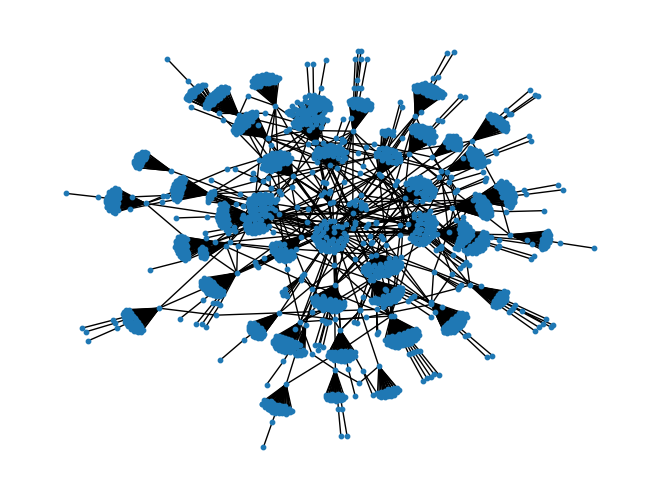

In [136]:
def create_subgraph(G, node):
    nodes = nx.single_source_shortest_path(G,node).keys()
    return G.subgraph(nodes)
H= create_subgraph(G,1229060372105134080)

nx.draw(H, node_size=10)

In [132]:
H.number_of_nodes()
sorted(H.degree, key=lambda x: x[1], reverse=True)

[(0.0, 1243),
 (1.3249114425590743e+18, 77),
 (1.32486661401421e+18, 62),
 (1.3248664845360128e+18, 58),
 (1.3248658133256806e+18, 58),
 (1.3248663021005087e+18, 57),
 (1.3248661063271834e+18, 57),
 (1.3248660110494351e+18, 55),
 (1.3248651233039196e+18, 55),
 (1.3248650496939827e+18, 55),
 (1.3248653336651407e+18, 54),
 (1.3248595154440806e+18, 53),
 (1.324860835483693e+18, 53),
 (1.3248606321733222e+18, 52),
 (1.324860749563351e+18, 52),
 (1.3247444448103014e+18, 52),
 (1.3248592038617539e+18, 50),
 (1.3247526599963976e+18, 49),
 (1.3248294610035548e+18, 49),
 (1.3248524024160952e+18, 48),
 (1.3248533922593382e+18, 48),
 (1.3248534624091054e+18, 48),
 (1.3248536650147676e+18, 48),
 (1.3248445393712906e+18, 48),
 (1.3248534089484902e+18, 47),
 (1.3248536600362885e+18, 47),
 (1.3248538369897964e+18, 47),
 (1.324844954322129e+18, 47),
 (1.3248449323398144e+18, 47),
 (1.3248452939140178e+18, 46),
 (1229060372105134080, 45),
 (1.324845481533436e+18, 45),
 (1.3248407485885276e+18, 45),
 (1

In [133]:
K = create_subgraph(H,1229060372105134080)
H.number_of_nodes()

3086

In [137]:
largest_subgraph = max((G.subgraph(c) for c in nx.connected_components(G)), key=len)

degrees_sub = [val for (node, val) in largest_subgraph.degree()]

largest_subgraph.number_of_nodes()#/3500 *100

2126

### Subgraph Visulization 

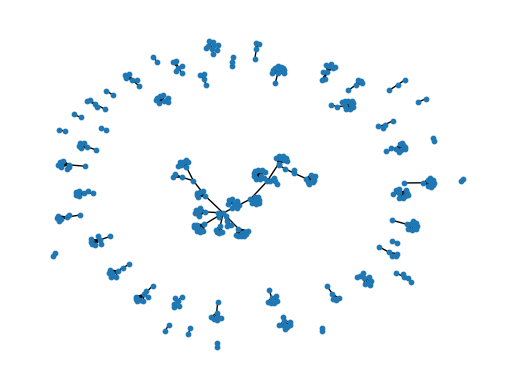

In [138]:
import random
random_sample_edges = random.sample(list(largest_subgraph.edges), 318)
G_sample = nx.Graph()
G_sample.add_edges_from(random_sample_edges)

plt.plot()
nx.draw(G_sample, node_size=10)
plt.show()

# Analysis 

## Centrality Analysis 

In [119]:
#Defines the draw function 
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=5, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    
    plt.axis('off')
    plt.show()

In [120]:
#Metrics 

def metrics(G):
    
    #trans = nx.transitivity(G)
    #avg = nx.average_clustering(G)
    #clust = nx.clustering(G)
    #assort = nx.degree_assortativity_coefficient(G)

    pos = nx.spring_layout(G)
    draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')
    plt.savefig("mygraph.png")
    draw(G, pos, nx.eigenvector_centrality(G), 'Eigenvector Centrality')
    plt.savefig("mygraph.png")
    draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
    plt.savefig("mygraph.png")
    return



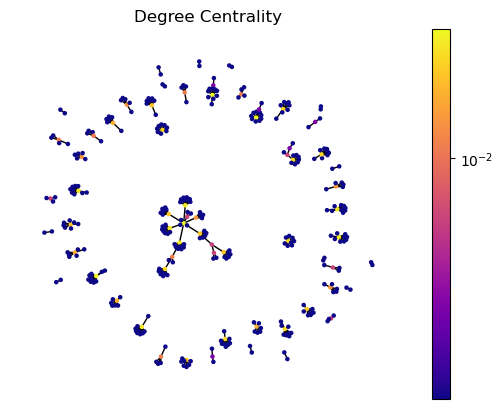

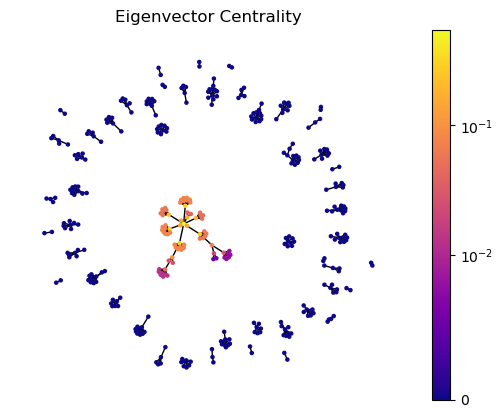

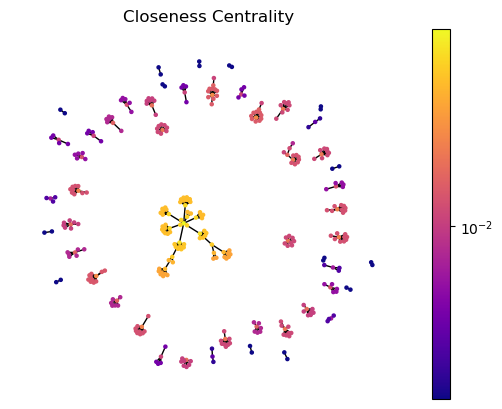

<Figure size 640x480 with 0 Axes>

In [139]:
metrics(G_sample)

## HK Model 

In [141]:
def HK(G,Tau, Time):
    """
    Description: Creates the Helgsemann-Krause in python. 

    Using the following formula:
        [INSERT FORMULA]

    Notes: 
        
    Args:
        G: undirected graph G
        Tau: float value ranging from 0.0 to 1.0
        Time: integer value for the number of epochs

    Output:
        x: list of values as time goes on according to the HK Model 
    """
    nodes = list(G.nodes) #Finds the node list of G
    n = G.number_of_nodes() #Finds the numeber of nodes in G from the node list 
    #Find max degree
    def d_alpha(G):
        """
        Description: Finds the alpha value for the graph (G) 

        Using the following formula:
            \alpha = 0.5/(max_i(di))

        Notes: 
            max_i: the maximum degree value in graph G

        Args:
            G: undirected graph G
            

        Output:
            alpha: alpha value for the graph 
        """
        MAX_DEG = max(d for _, d in G.degree()) #Gets the degrees of graph G and then picks the max
        alpha = 0.5 / MAX_DEG #Arthimatic for alpha
        return alpha

    def L_RW(G):
        """
        Description: Finds the random walk laplacian for the graph (G) 

        Using the following formula:
           [INSERT FORMULA]

        Args:
            G: undirected graph G
            n: number of nodes in graph G
        Output:
            L: the random walk laplacian matrix for graph G
        """
        L = np.zeros((n, n))
        for l in range(n):
            for m in range(n):
                if l == m:
                    L[l][m] = 1
                elif G.has_edge(nodes[l], nodes[m]) == True:
                    L[l][m] = -1/G.degree(nodes[l])
        return L 


    w = np.multiply((1-d_alpha(G)),np.identity(n)) - np.multiply(d_alpha(G),L_RW(G)) #Finds the mixing matrix 
    x = np.empty((n, Time)) #Creates an empty n x time matrix 
    x[:,0] = np.random.uniform(0, 1, n) #Creates an intial vector and puts it into the first column of x 


    #HK Confidence
    for t in range(1,Time):
        for i in range(n):
            sum1 = 0 #Sum for the numerator
            sum2 = 0 #Sum for the denominator
            x_i = x[i] [t-1] #Gets the previous state of x_i
            for j in range(n): 
                x_j = x[j][t-1] #Defines x_j similarly to x_i
                d_ij = np.abs(x_i - x_j) #Finds the absolute value of x_i and x_j
                u = 1 if d_ij <= Tau else 0 #U function 
                sum1 += w[i][j] * u * x_j #Adds to the numerator sum 
                sum2 += w[i][j] * u #Adds to the denominator sum 
            x[i][t]= (sum1 / sum2)
            
    plt.figure(figsize = (10,10)) #Creates the figure
    for k in range(len(list(G.nodes()))): #Range for the graph 
        plt.plot(x[k,:]) #Adds the plots to the figures 
    return(plt.show())

In [142]:
HK(G_sample,0.1,4000) #With Tau value of 0.1

KeyboardInterrupt: 

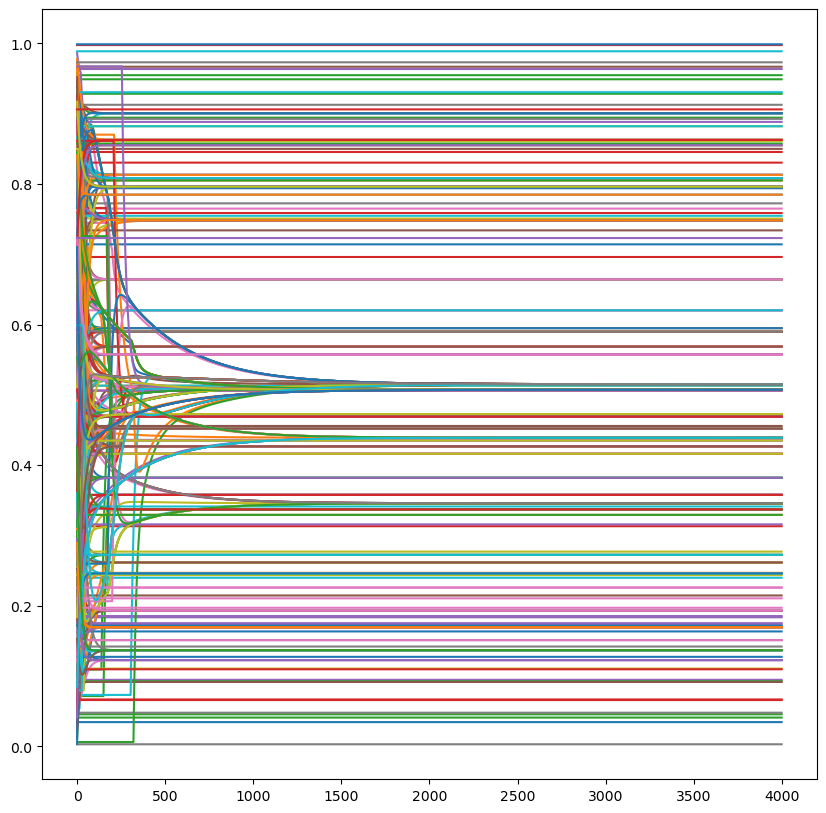

In [45]:
HK(G_sample,0.5,4000) #With Tau value of 0.5


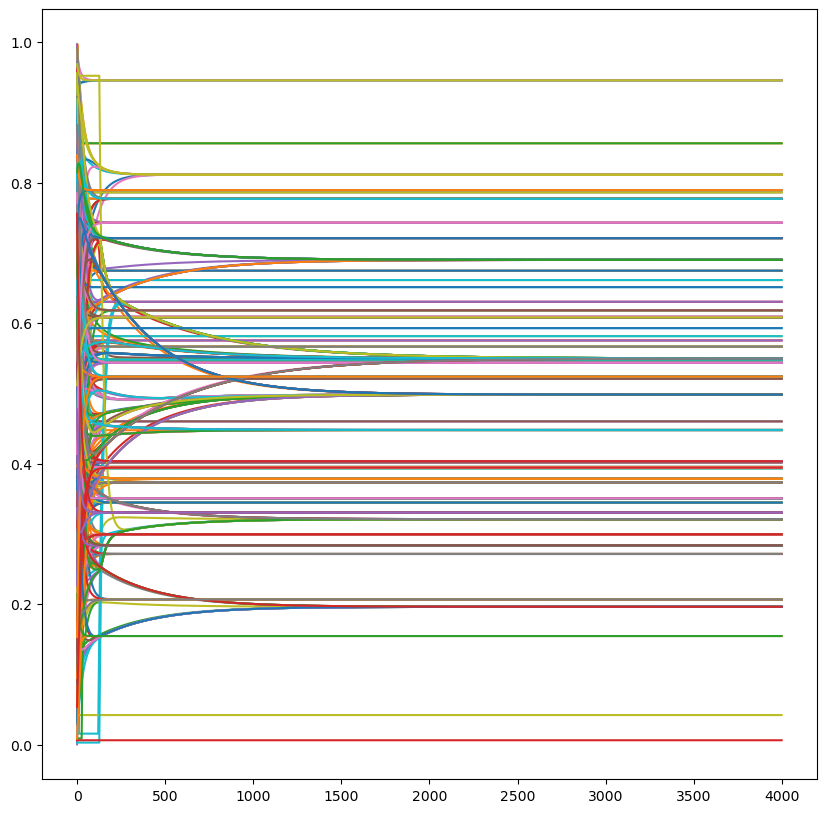

In [46]:
HK(G_sample,0.7,4000) #With Tau value of 0.7

## DeGroot Model

In [12]:
def degroot_model(G, timesteps):
    # initialize the beliefs of each node to 0
    beliefs = [0 for _ in range(G.number_of_nodes())]

    # simulate the convergence of the model over the specified number of timesteps
    for t in range(timesteps):
        # update the beliefs of each node using the DeGroot model
        beliefs = [sum(G.degree(i, weight='weight') * beliefs[i] for i in G[node]) for node in G]

        # normalize the beliefs of each node so that they sum to 1
        beliefs = [b / sum(beliefs) for b in beliefs]

        # visualize the convergence over time
        plt.plot(range(t+1), beliefs)
        plt.xlabel('Timestep')
        plt.ylabel('Belief')

    plt.show()

In [144]:
beliefs = [0 for _ in range(G_sample.number_of_nodes())]
beliefs = [sum(G_sample.degree(i, weight='weight') * beliefs[i] for i in G_sample[node]) for node in G_sample]

IndexError: list index out of range

In [145]:
degroot_model(G_sample, 10)

IndexError: list index out of range

## GCN Analysis 

In [164]:
import networkx as nx
import torch
import torch.nn as nn
import sklearn 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# create a GCN model for the graph
class GCN(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super().__init__()

        # define the model layers
        self.gcn_layer = nn.Linear(in_features + hidden_features, hidden_features)
        self.output_layer = nn.Linear(hidden_features, out_features)

    def forward(self, x, adjacency_matrix):
        # apply the GCN layer using the adjacency matrix
        hidden = torch.relu(self.gcn_layer(torch.cat((x, torch.mm(adjacency_matrix, x)), dim=1)))

        # apply the output layer
        output = self.output_layer(hidden)

        return output

gcn = GCN(in_features=1, hidden_features=1, out_features=1)

# create an input tensor for the graph with shape (number of nodes, number of input features)
x = torch.randn(G_sample.number_of_nodes(), 1)

# create an adjacency matrix for the graph with shape (number of nodes, number of nodes)
adjacency_matrix = torch.tensor(nx.to_numpy_matrix(G_sample), dtype=torch.float)

# apply the GCN model to the input tensor and adjacency matrix
output = gcn(x, adjacency_matrix)

# # reduce the dimensions of the output using TSNE
# tsne = TSNE(n_components=2)
# embedding_2d = tsne.fit_transform(tsne)

# # plot the 2d embedding of the graph
# plt.scatter(embedding_2d[:,0], embedding_2d[:,1])
# plt.show()

In [153]:
G_sample.nodes()

NodeView((1.3248592038617539e+18, 509384598, 836867256, 1.3249097119557796e+18, 1.3248605022882406e+18, 1241585661448081409, nan, 23556222, 1340302418, 1.3249008456415887e+18, 1.3248653336651407e+18, 2736365747, 401684906, 43368583, nan, 1229060372105134080, 1.3245744897625539e+18, 1.3247526599963976e+18, 116837392, 1.3248595154440806e+18, 1002344948275048449, 1289336257110315009, 1.3248524024160952e+18, 983313131454820352, 1.3248606321733222e+18, 1006311242498109440, 69256645, 2858925305, 1.3248536650147676e+18, 3259389906, 1.3248658133256806e+18, 1041814437525475328, 1.324845481533436e+18, 545429410, 1.324860749563351e+18, 1266549560014487552, 809888578641756160, 1.3249114425590743e+18, 784609596426035200, nan, 1546460323, 1.3248454622103224e+18, 981266373098614785, 873591479809265664, 1.3248533922593382e+18, 1277076700950642688, 1.3248664845360128e+18, 2917954106, 1.3248661063271834e+18, 804468982245822465, 501401166, 1.3249007472516424e+18, 1.324860835483693e+18, 3051577197, 1.3248

## Opinion Evolution 

In [151]:
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution

# Algorithmic Bias model
model = op.AlgorithmicBiasModel(G_sample)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.32)
config.add_model_parameter("gamma", 0.5)
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)

viz = OpinionEvolution(model, iterations)
viz.plot("opinion_ev.pdf")

IndexError: index 509384598 is out of bounds for axis 0 with size 369

In [166]:
from networkx.algorithms import community
nx.community.louvain_communities(G)



[{14833394,
  15790644,
  17074734,
  17840670,
  17976820,
  43240822,
  47212311,
  98042618,
  162429654,
  189886847,
  227465979,
  257973635,
  370306617,
  386331159,
  450954156,
  521966673,
  523558635,
  798949909,
  898144386,
  2288898117,
  2329819892,
  2690167704,
  2857853061,
  2969020942,
  3092210625,
  3237851740,
  4914539795,
  702996215911342080,
  794000274356629504,
  816049466281197568,
  823208050601267200,
  829766647443496960,
  902650857249923073,
  933565985533050880,
  1148688546129219586,
  1176825754786697216,
  1193520380998307842,
  1194149504297111553,
  1195578355057397761,
  1219104831182270466,
  1220524667632357376,
  1243073726549286917,
  1243274347202121737,
  1258242021900406784,
  1267242133250949121,
  1277866890845491200,
  1313881655866789890,
  1.3248663021005087e+18,
  nan,
  nan,
  nan,
  nan,
  1291511172953329664,
  1322407306039074817},
 {16016625,
  20197657,
  22666949,
  49818137,
  50875502,
  69732035,
  191507439,
  30100669

In [172]:
import matplotlib.cm as cm
import community as community_louvain
#first compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

AttributeError: module 'community' has no attribute 'best_partition'